In [1]:
cd ..

/Users/paolo/Desktop/leonardo/Leonardo-TC


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from src.leonardo.embedding_model import clean_embeddings, compute_embeddings, load_data , load_data_test


/Users/paolo/conda/envs/leonardo/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


/Users/paolo/conda/envs/leonardo/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/var/folders/5c/xp7pml6x75x32v16v990ccwc0000gn/T/ipykernel_6041/1503188010.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c="Blue", cmap='viridis', alpha=0.7)


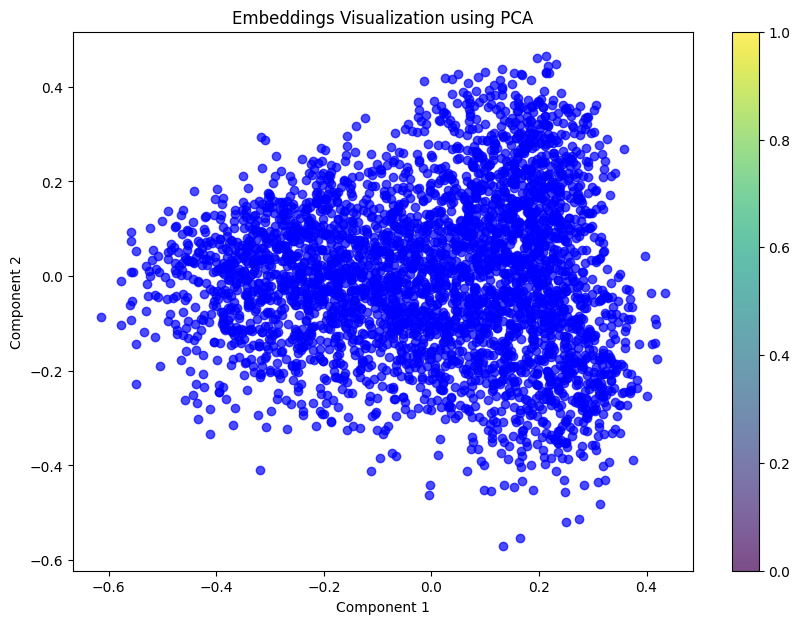

In [4]:

# Step 1: Load and compute embeddings (assuming you have these functions)
file_path = "dataset/train.csv"
descriptions, target = load_data(file_path)
embeddings = compute_embeddings(descriptions)
embeddings , _= clean_embeddings(embeddings)
# Convert embeddings to NumPy array if they are PyTorch tensors
if isinstance(embeddings, torch.Tensor):
    embeddings = embeddings.detach().cpu().numpy()


# Step 3: Visualize the embeddings using PCA
def visualize_embeddings(embeddings, labels=None, method='pca', n_components=2):
    if method == 'pca':
        reducer = PCA(n_components=n_components)
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, random_state=42)
    else:
        raise ValueError("Method should be either 'pca' or 'tsne'")
    
    reduced_embeddings = reducer.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c="Blue", cmap='viridis', alpha=0.7)
    
    if labels is not None:
        plt.colorbar(scatter)
    plt.title(f'Embeddings Visualization using {method.upper()}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Visualize cleaned embeddings using PCA
visualize_embeddings(embeddings, labels=target, method='pca')

# Optionally, visualize using t-SNE
# visualize_embeddings(cleaned_embeddings, labels=target, method='tsne')


/Users/paolo/conda/envs/leonardo/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/var/folders/5c/xp7pml6x75x32v16v990ccwc0000gn/T/ipykernel_6041/1365631052.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c= None, cmap='viridis', alpha=0.7)


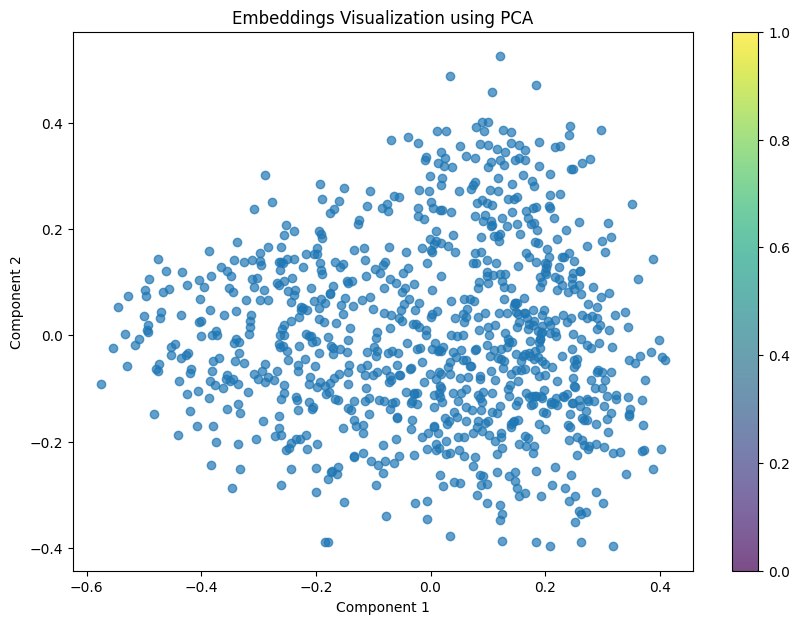

In [5]:

# Step 1: Load and compute embeddings (assuming you have these functions)
file_path = "dataset/test.csv"
descriptions, target = load_data_test(file_path)
embeddings = compute_embeddings(descriptions)
embeddings, _ = clean_embeddings(embeddings)
# Convert embeddings to NumPy array if they are PyTorch tensors
if isinstance(embeddings, torch.Tensor):
    embeddings = embeddings.detach().cpu().numpy()


# Step 3: Visualize the embeddings using PCA
def visualize_embeddings(embeddings, labels=None, method='pca', n_components=2):
    if method == 'pca':
        reducer = PCA(n_components=n_components)
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, random_state=42)
    else:
        raise ValueError("Method should be either 'pca' or 'tsne'")
    
    reduced_embeddings = reducer.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c= None, cmap='viridis', alpha=0.7)
    
    if labels is not None:
        plt.colorbar(scatter)
    plt.title(f'Embeddings Visualization using {method.upper()}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Visualize cleaned embeddings using PCA
visualize_embeddings(embeddings, labels=target, method='pca')

# Optionally, visualize using t-SNE
# visualize_embeddings(cleaned_embeddings, labels=target, method='tsne')
